In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# Replace 'spotify_tracks.csv' with your dataset file path
df = pd.read_csv('spotify_tracks.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,rating,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,7.3,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,5.5,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,5.7,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,7.1,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,8.2,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Selecting features (input variables) and the target variable (output)
X = df[['danceability', 'energy', 'loudness', 'tempo', 'valence']]
y = df['rating']  # Assuming 'rating' is the target variable

# Display the first few rows of the selected features
X.head()


,danceability,energy,loudness,tempo,valence
0,0.676,0.4610,-6.746,87.917,0.715
1,0.420,0.1660,-17.235,77.489,0.267
2,0.438,0.3590,-9.734,76.332,0.120
3,0.266,0.0596,-18.515,181.740,0.143
4,0.618,0.4430,-9.681,119.949,0.167


In [6]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print(X_scaled[:5])


[[ 0.62924424 -0.71714792  0.30082834 -1.14186279  0.92930586]
 [-0.84590798 -1.88997974 -1.78474412 -1.48971712 -0.79868969]
 [-0.74218634 -1.12266943 -0.2932884  -1.528312   -1.36568823]
 [-1.73330424 -2.31299433 -2.03925196  1.98785885 -1.27697417]
 [ 0.29503007 -0.78871054 -0.28275019 -0.07334821 -1.18440298]]


In [7]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print(X_scaled[:5])


[[ 0.62924424 -0.71714792  0.30082834 -1.14186279  0.92930586]
 [-0.84590798 -1.88997974 -1.78474412 -1.48971712 -0.79868969]
 [-0.74218634 -1.12266943 -0.2932884  -1.528312   -1.36568823]
 [-1.73330424 -2.31299433 -2.03925196  1.98785885 -1.27697417]
 [ 0.29503007 -0.78871054 -0.28275019 -0.07334821 -1.18440298]]


In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (91200, 5)
X_test shape: (22800, 5)
y_train shape: (91200,)
y_test shape: (22800,)


In [9]:
# Initialize the KNN model with k=5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [10]:
# Predict the ratings for the test set
y_pred = knn.predict(X_test)

# Display the first few predictions
print(y_pred[:5])



[4.86 1.38 2.02 0.   3.5 ]


In [11]:
# Calculate and display evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.5345166666666665
Mean Squared Error (MSE): 4.045191421052633
R² Score: 0.18027393931670987


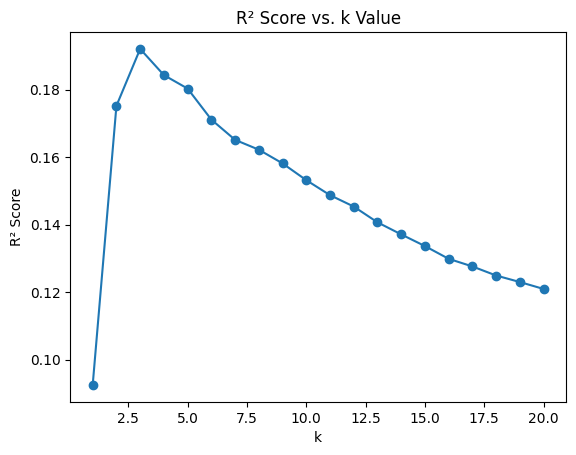

Best k value: 3


In [12]:
# List to store the R² scores for different values of k
r2_scores = []

# Try different values of k (from 1 to 20)
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Plot the R² scores
plt.plot(range(1, 21), r2_scores, marker='o')
plt.title('R² Score vs. k Value')
plt.xlabel('k')
plt.ylabel('R² Score')
plt.show()

# Display the best k value
best_k = np.argmax(r2_scores) + 1
print("Best k value:", best_k)


In [13]:
# Retrain the KNN model with the best k value
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions and evaluate again
y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Retrained Model - Mean Absolute Error (MAE):", mae)
print("Retrained Model - Mean Squared Error (MSE):", mse)
print("Retrained Model - R² Score:", r2)


Retrained Model - Mean Absolute Error (MAE): 1.4668757309941518
Retrained Model - Mean Squared Error (MSE): 3.987196539961014
Retrained Model - R² Score: 0.19202614346942648
